In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../exam/datasets/airline_satisfaction.csv")

In [3]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


## Pre-requisite
Take as a starting point your "cleaned dataset":
- You should only have variables that contain useful information
- You should have a solution for your N/A values (to go beyond simple value replacing: https://scikit-learn.org/stable/modules/impute.html)
- You should know your quantitative and qualitative variables
- You should have an idea **of the score you want to optimize**.

If you have a dataset with qualitative variables that you cannot drop, you should transform them using: one-hot encoding (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

> For this lab, if you are short on time, you can directly use only your **quantitative variables**, that you can store in `quantitative_df`.

In [4]:
df=df.drop(["id"],axis=1)

In [5]:
df.columns = [c.replace(' ', '_') for c in df.columns] #pour changer les noms de variables

In [6]:
df.columns = [c.replace('/', '_') for c in df.columns]

In [7]:
df.columns = [c.replace('-', '_') for c in df.columns]

In [8]:
df["moyenne_satisfaction"]=(df.Inflight_wifi_service + df.Departure_Arrival_time_convenient
+df.Ease_of_Online_booking+ df.Gate_location +df.Food_and_drink
+ df.Online_boarding + df.Seat_comfort + df.Inflight_entertainment +df.On_board_service 
+df.Leg_room_service + df.Baggage_handling + df.Checkin_service +df.Inflight_service +df.Cleanliness)/14

In [9]:
df

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,moyenne_satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,3.857143
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,2.285714
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,3.714286
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,3.000000
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,3,2,4,4,5,4,0,0.0,neutral or dissatisfied,3.357143
129876,25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,5,5,5,5,4,0,0.0,satisfied,4.285714
129877,25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,4,3,4,5,4,2,0,0.0,neutral or dissatisfied,3.000000
129878,25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,3,2,5,4,5,4,0,0.0,satisfied,3.642857


In [10]:
for val in df["Gender"]:
    if val=="Male":
        df["Gender"] = df["Gender"].replace("Male",1)
    else :
        df["Gender"] = df["Gender"].replace("Female",0)

In [11]:
for val in df["Customer_Type"]:
    if val=="Loyal Customer":
        df["Customer_Type"] = df["Customer_Type"].replace("Loyal Customer",1)
    else :
        df["Customer_Type"] = df["Customer_Type"].replace("disloyal Customer",0)

In [12]:
for val in df["Type_of_Travel"]:
    if val=="Personal Travel":
        df["Type_of_Travel"] = df["Type_of_Travel"].replace("Personal Travel",1)
    else :
        df["Type_of_Travel"] = df["Type_of_Travel"].replace("Business travel",0)

In [13]:
for val in df["Class"]:
    if val=="Business":
        df["Class"] = df["Class"].replace("Business",0)
    if val=="Eco":
        df["Class"] = df["Class"].replace("Eco",1)
    if val=="Eco Plus":
        df["Class"] = df["Class"].replace("Eco Plus",2)

In [14]:
df

,Unnamed:_0,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,moyenne_satisfaction
0,0,1,1,13,1,2,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,3.857143
1,1,1,0,25,0,0,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,2.285714
2,2,0,1,26,0,0,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,3.714286
3,3,0,1,25,0,0,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,3.000000
4,4,1,1,61,0,0,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,1,0,34,0,0,526,3,3,3,...,3,2,4,4,5,4,0,0.0,neutral or dissatisfied,3.357143
129876,25972,1,1,23,0,0,646,4,4,4,...,4,5,5,5,5,4,0,0.0,satisfied,4.285714
129877,25973,0,1,17,1,1,828,2,5,1,...,4,3,4,5,4,2,0,0.0,neutral or dissatisfied,3.000000
129878,25974,1,1,14,0,0,1127,3,3,3,...,3,2,5,4,5,4,0,0.0,satisfied,3.642857


In [15]:
quantitative_vars=["Age","Flight_Distance","Departure_Delay_in_Minutes","Arrival_Delay_in_Minutes"
                   ,"moyenne_satisfaction"]
qualitative_vars=["Gender","Customer_Type","Type_of_Travel","Class","Inflight_wifi_service"
                  ,"Departure_Arrival_time_convenient","Ease_of_Online_booking","Gate_location"
                 ,"Food_and_drink","Online_boarding","Seat_comfort","Inflight_entertainment"
                  ,"On_board_service","Leg_room_service","Baggage_handling","Checkin_service"
                  ,"Inflight_service","Cleanliness"]

In [16]:
features = quantitative_vars + qualitative_vars
target=["satisfaction"]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer_Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure_Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

In [18]:
for variable in quantitative_vars:
    df[variable].fillna(df[variable].mean(), inplace=True)

In [19]:
for variable in qualitative_vars:
    df[variable].fillna("n/a", inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed:_0                         129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer_Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type_of_Travel                     129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight_Distance                    129880 non-null  int64  
 7   Inflight_wifi_service              129880 non-null  int64  
 8   Departure_Arrival_time_convenient  129880 non-null  int64  
 9   Ease_of_Online_booking             129880 non-null  int64  
 10  Gate_location                      129880 non-null  int64  
 11  Food_and_drink                     1298

## Introduction to sklearn
`sklearn` (https://scikit-learn.org/stable/index.html) is one of the most popular library for Machine Learning in Python and is a must know for any data scientist.
It provides plenty of different utilities for Machine Learning:
- Preprocessing
- Dimensionality reduction
- Clustering algorithm
- Classification algorithms

Today we will learn the basic of using sklearn for **classification on the dataset you have chosen**.

### Sklearn basics for classification

`sklearn` relies on using classes to create classifiers. A classifier is any class with a method `.fit` and `.predict`:
- `.fit`: trains the model on the dataset.
- `.predict`: predicts the score on an input vector.

Each of these methods take as input `numpy.array` (to transform a `pandas.DataFrame` into a numpy array use the `values` method).

### Example for a random classifier on the Titanic dataset

In [21]:
from sklearn.dummy import DummyClassifier

In [22]:
# My target is survived 
y = df.satisfaction.values
# I will only take 2 quantitative as X for demonstration
X = df[["Age", "Gender"]].values

In [23]:
# I create an object of class DummyClassifier
dummy_classifier = DummyClassifier()

# I train it
dummy_classifier.fit(X, y)

DummyClassifier()

I can use the `predict` method to predict on my target `y`.

In [24]:
prediction = dummy_classifier.predict(y)

In [25]:
prediction

array(['neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied', ..., 'neutral or dissatisfied',
       'neutral or dissatisfied', 'neutral or dissatisfied'], dtype='<U23')

I can then compute the accuracy score of my model (for a list of all available scores on sklearn read: https://scikit-learn.org/stable/modules/model_evaluation.html), by comparing my vector `prediction` and my ground truth vector `y`.

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy = accuracy_score(y, prediction)

In [28]:
print("========= Accuracy of dummy classifier ============")
print(accuracy)

========= Accuracy of dummy classifier ============
0.5655374191561441


Text(0, 0.5, 'Gender')

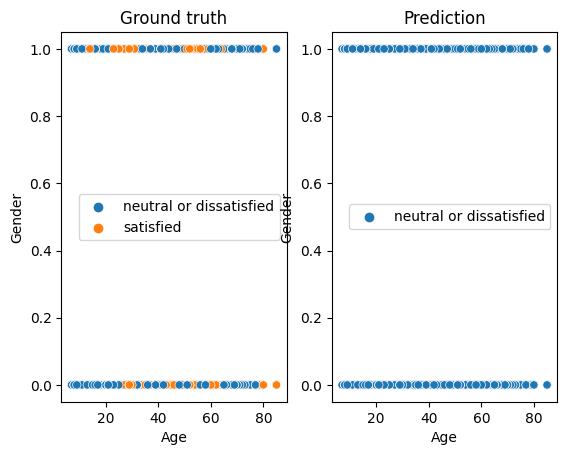

In [29]:
fig, ax =plt.subplots(1,2)



sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, ax=ax[0])
ax[0].set_title("Ground truth")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Gender")

sns.scatterplot(x=X[:,0], y=X[:,1], hue=prediction, ax=ax[1])
ax[1].set_title("Prediction")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Gender")

**Exercice**: 
- Compute the *recall* and the *precision* on the prediction of the dummy classifier and conclude regarding the importance of using several scoring metrics. What is your remark regarding the precision and how can you explain it ?
- *Bonus*: re-code the *recall*, *accuracy*, *precision* (good for you if you want to revise the course!)
- *Bonus*: What are your remarks concerning a 61% accuracy score for a dummy classifier ? What can you compare it to ?

In [30]:
from sklearn.metrics import precision_score

In [31]:
precision = precision_score(y, prediction,pos_label='satisfied')

/Users/daniel/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import recall_score

In [33]:
recall = recall_score(y, prediction,pos_label='satisfied')

In [34]:
recall

0.0

## Using K-nearest neigbhor classifier

**Exercice**:
Using the class `KNeighborsClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (**read the doc beforehand!**), run:
- A KNeighborsClassifier with $k \in \{1, 3, 5, 7, 9\}$ and $dist \in {euclidean, manhattan}$

- *Bonus*: Test other distances, **and be critical about it!**, especially if you have qualitative variable.
- *Bonus++*: Create your own distance, especially if you're working with a mix of quantitative/qualitative/ordinal variables. 

- Plot on the same plot the *accuracy* score, the *recall* score, the *precision* score, as a function of $k$ for each distance (and put them side by side).

- "Conclude" regarding:
    - The performance of knn in general on your dataset
    - The best $k$ to select
    - The best distance to select
- *Bonus*: perform a deeper analysis of your classifier, using graphical and statistical tools to analyze the records that were misclassified, and try explaining the results.

**Question**: why is what we just did not sufficient to conclude ?

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

In [36]:
accuracy_scores_euc1 = []
precision_scores_euc1 = []
recall_scores_euc1 = []

for k in [1, 3, 5, 7, 9]:
    print(f"k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    print("======= Train KNN")
    knn.fit(X, y)
    print("======= Predict on training data")
    prediction = knn.predict(X)
    accuracy_scores_euc1.append(accuracy_score(prediction, y))
    precision_scores_euc1.append(precision_score(prediction, y,pos_label="satisfied"))
    recall_scores_euc1.append(recall_score(prediction, y,pos_label="satisfied"))
    
accuracy_scores_man1 = []
precision_scores_man1 = []
recall_scores_man1 = []

neighbors = [1, 3, 5, 7, 9]

for k in neighbors:
    print(f"k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    print("======= Train KNN")
    knn.fit(X, y)
    print("======= Predict on training data")
    prediction = knn.predict(X)
    accuracy_scores_man1.append(accuracy_score(prediction, y))
    precision_scores_man1.append(precision_score(prediction, y,pos_label="satisfied"))
    recall_scores_man1.append(recall_score(prediction, y,pos_label="satisfied"))

k = 1
======= Train KNN
======= Predict on training data
k = 3
======= Train KNN
======= Predict on training data
k = 5
======= Train KNN
======= Predict on training data
k = 7
======= Train KNN
======= Predict on training data
k = 9
======= Train KNN
======= Predict on training data
k = 1
======= Train KNN
======= Predict on training data
k = 3
======= Train KNN
======= Predict on training data
k = 5
======= Train KNN
======= Predict on training data
k = 7
======= Train KNN
======= Predict on training data
k = 9
======= Train KNN
======= Predict on training data


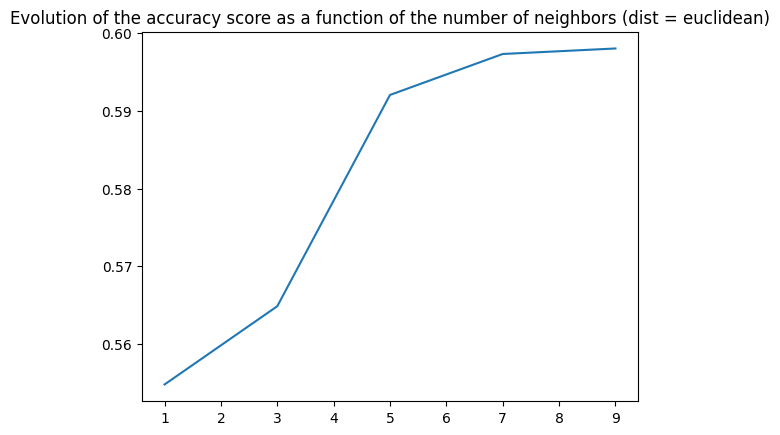

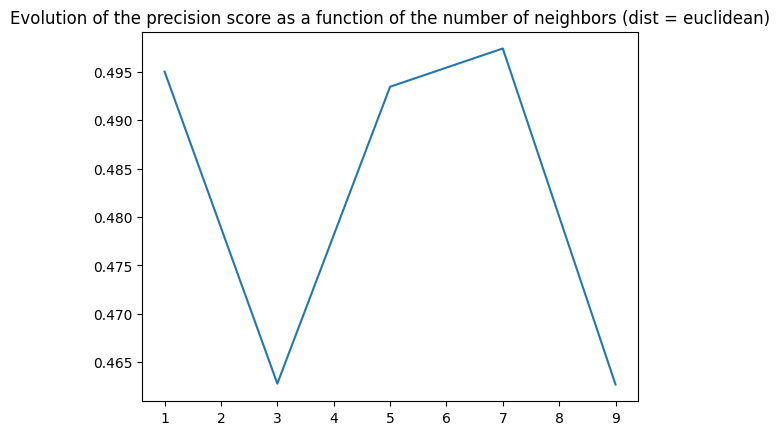

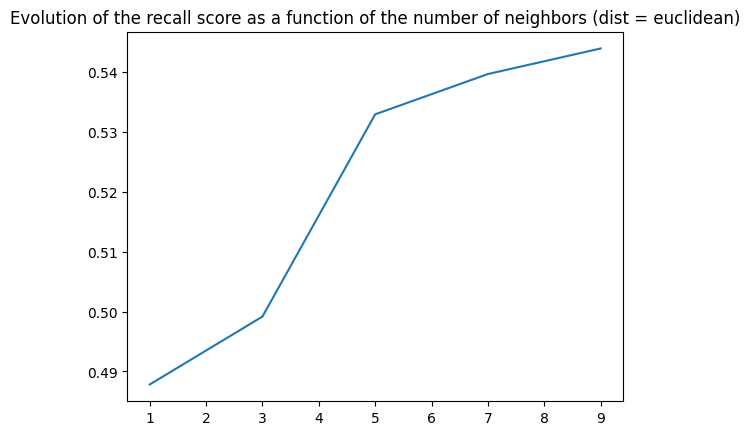

In [37]:
plt.plot(neighbors, accuracy_scores_euc1)
plt.title("Evolution of the accuracy score as a function of the number of neighbors (dist = euclidean)")
plt.show()

plt.plot(neighbors, precision_scores_euc1)
plt.title("Evolution of the precision score as a function of the number of neighbors (dist = euclidean)")

plt.show()

plt.plot(neighbors, recall_scores_euc1)
plt.title("Evolution of the recall score as a function of the number of neighbors (dist = euclidean)")

plt.show()

***Remember what X and y are:***

In [38]:
X

array([[13,  1],
       [25,  1],
       [26,  0],
       ...,
       [17,  0],
       [14,  1],
       [42,  0]])

In [39]:
y

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'neutral or dissatisfied', 'satisfied',
       'neutral or dissatisfied'], dtype=object)

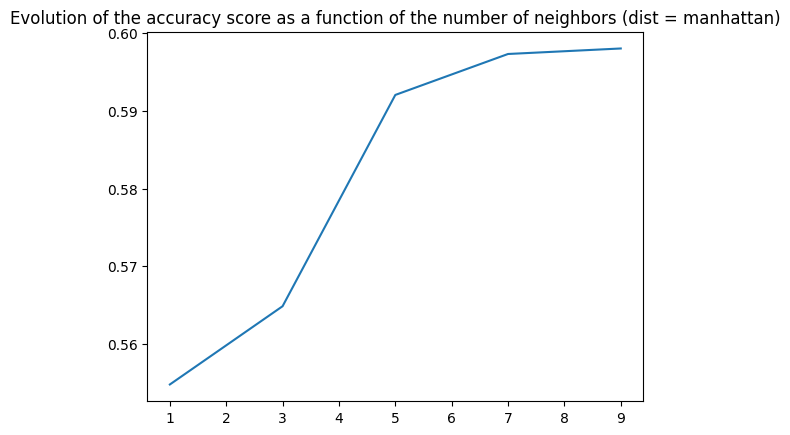

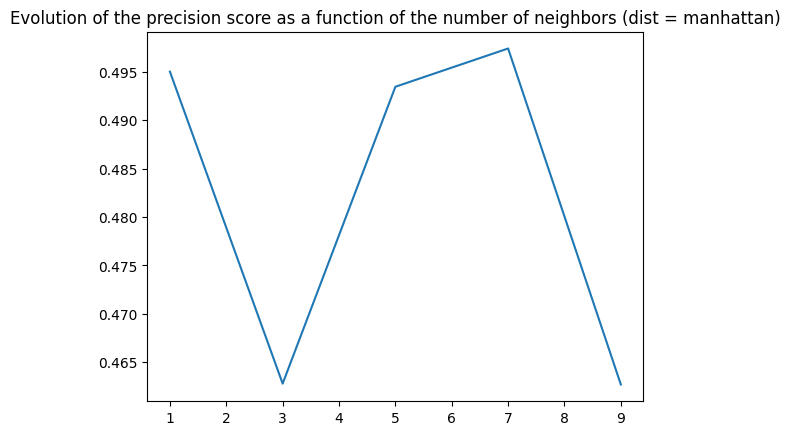

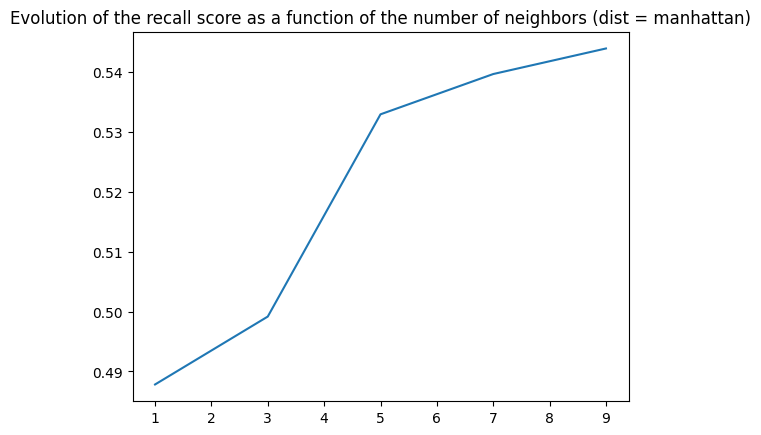

In [40]:
plt.plot(neighbors, accuracy_scores_man1)
plt.title("Evolution of the accuracy score as a function of the number of neighbors (dist = manhattan)")
plt.show()

plt.plot(neighbors, precision_scores_man1)
plt.title("Evolution of the precision score as a function of the number of neighbors (dist = manhattan)")

plt.show()

plt.plot(neighbors, recall_scores_man1)
plt.title("Evolution of the recall score as a function of the number of neighbors (dist = manhattan)")

plt.show()

## Splitting into train and test
It is impossible to conclude regarding the efficiency of a classification algorithms without at least splitting into **train and test**!

We will use the utilities provided by `sklearn`: https://scikit-learn.org/stable/modules/cross_validation.html.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Split intro 4 datasets: X_train, y_train, X_test, y_test, with a 70% / 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Exercice**: 
- Compute the accuracy, recall, precision on the train and test datasets and compare.
- Vary the values of $k$ and of the distance and select the best combination.
- Conclude regarding the performance of KNN on your dataset by running it on the whole dataset once a gain.
- *Bonus*: perform the same exercice, but this time using **stratified splits** (`stratify` argument set to True). What is the point of using `stratified` splits ? Does this make sense to solve your own problem ?

**Question**: what are the limits of train/test split ?

In [43]:
accuracy_scores_man2 = []
precision_scores_man2 = []
recall_scores_man2 = []

neighbors = [1, 3, 5, 7, 9]

for k in neighbors:
    print(f"k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    print("======= Train KNN")
    knn.fit(X_train, y_train)
    print("======= Predict on training data")
    prediction = knn.predict(X_test)
    accuracy_scores_man2.append(accuracy_score(prediction, y_test))
    precision_scores_man2.append(precision_score(prediction, y_test,pos_label="satisfied"))
    recall_scores_man2.append(recall_score(prediction, y_test,pos_label="satisfied"))

k = 1
======= Train KNN
======= Predict on training data
k = 3
======= Train KNN
======= Predict on training data
k = 5
======= Train KNN
======= Predict on training data
k = 7
======= Train KNN
======= Predict on training data
k = 9
======= Train KNN
======= Predict on training data


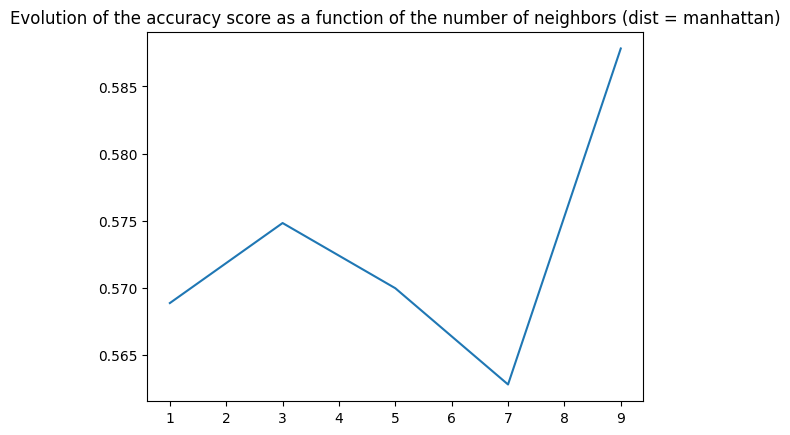

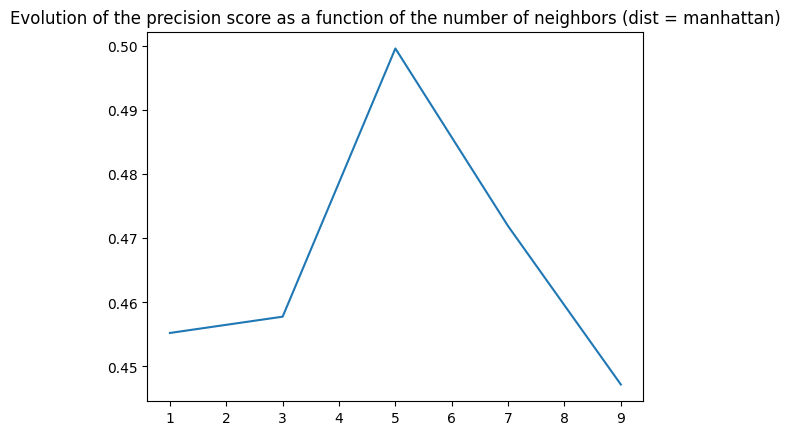

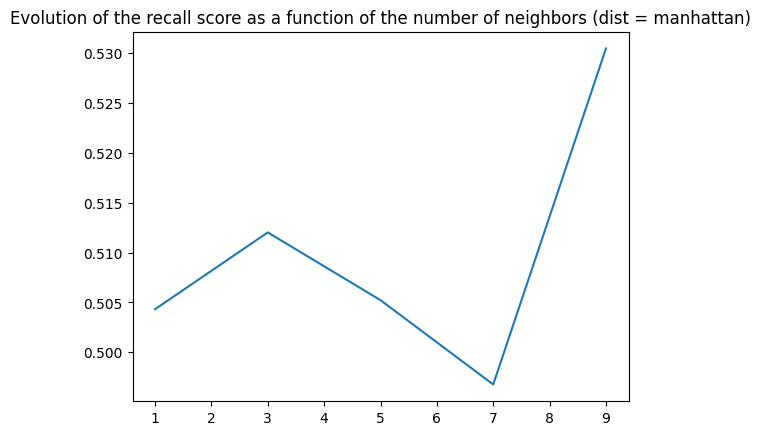

In [44]:
plt.plot(neighbors, accuracy_scores_man2)
plt.title("Evolution of the accuracy score as a function of the number of neighbors (dist = manhattan)")
plt.show()

plt.plot(neighbors, precision_scores_man2)
plt.title("Evolution of the precision score as a function of the number of neighbors (dist = manhattan)")

plt.show()

plt.plot(neighbors, recall_scores_man2)
plt.title("Evolution of the recall score as a function of the number of neighbors (dist = manhattan)")

plt.show()

In [45]:
accuracy_scores_euc2 = []
precision_scores_euc2 = []
recall_scores_euc2 = []

neighbors = [1, 3, 5, 7, 9]

for k in neighbors:
    print(f"k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    print("======= Train KNN")
    knn.fit(X_train, y_train)
    print("======= Predict on training data")
    prediction = knn.predict(X_test)
    accuracy_scores_euc2.append(accuracy_score(prediction, y_test))
    precision_scores_euc2.append(precision_score(prediction, y_test,pos_label="satisfied"))
    recall_scores_euc2.append(recall_score(prediction, y_test,pos_label="satisfied"))

k = 1
======= Train KNN
======= Predict on training data
k = 3
======= Train KNN
======= Predict on training data
k = 5
======= Train KNN
======= Predict on training data
k = 7
======= Train KNN
======= Predict on training data
k = 9
======= Train KNN
======= Predict on training data


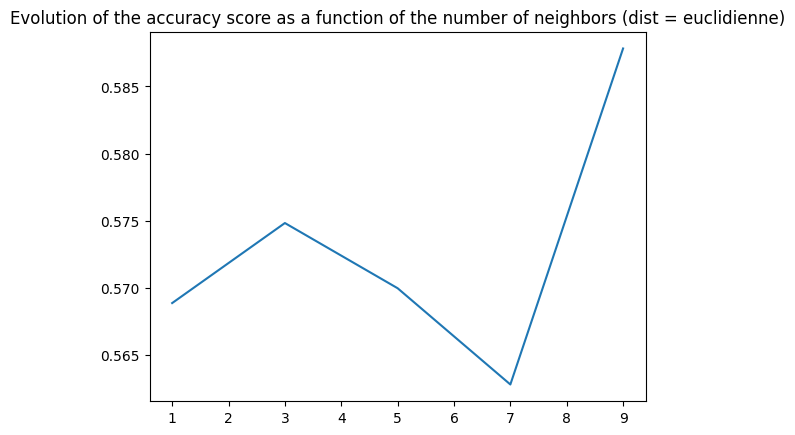

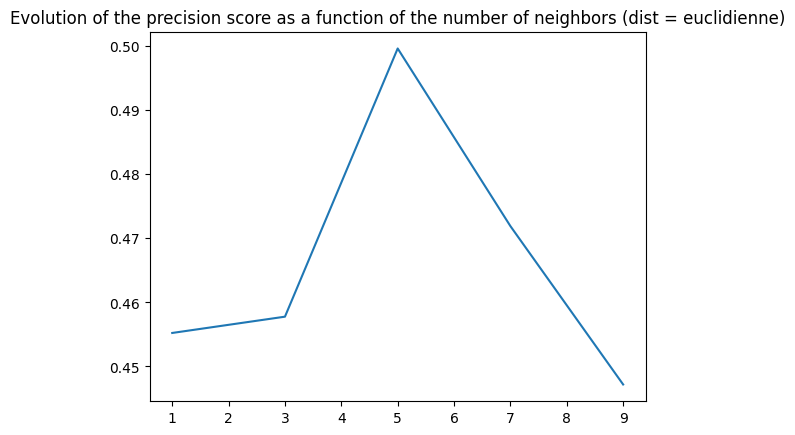

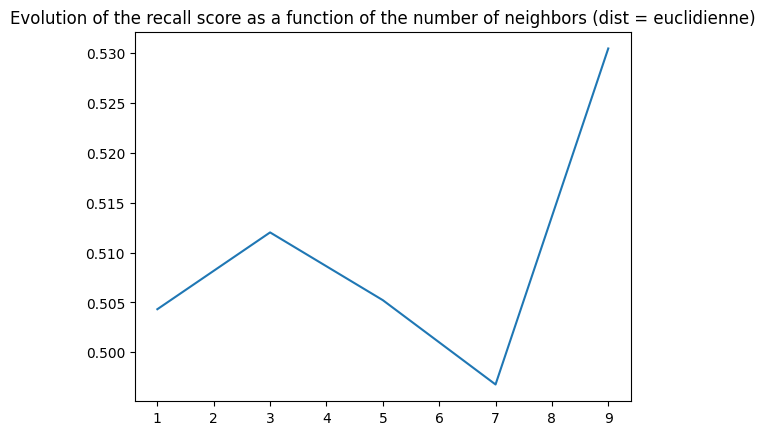

In [46]:
plt.plot(neighbors, accuracy_scores_euc2)
plt.title("Evolution of the accuracy score as a function of the number of neighbors (dist = euclidienne)")
plt.show()

plt.plot(neighbors, precision_scores_euc2)
plt.title("Evolution of the precision score as a function of the number of neighbors (dist = euclidienne)")

plt.show()

plt.plot(neighbors, recall_scores_euc2)
plt.title("Evolution of the recall score as a function of the number of neighbors (dist = euclidienne)")

plt.show()

In [47]:
accuracy_scores_euc2

[0.5688840981418746,
 0.5748383122882661,
 0.5699876809362489,
 0.56282722513089,
 0.5878246586592752]

In [48]:
accuracy_scores_man2

[0.5688840981418746,
 0.5748383122882661,
 0.5699876809362489,
 0.56282722513089,
 0.5878246586592752]

In [49]:
precision_scores_euc2

[0.45522740696987596,
 0.45776727702303605,
 0.49958653278204374,
 0.4718842291789722,
 0.44719432959243943]

In [50]:
precision_scores_man2

[0.45522740696987596,
 0.45776727702303605,
 0.49958653278204374,
 0.4718842291789722,
 0.44719432959243943]

In [52]:
df.to_csv("processed_data.csv")